# Covid Data Plotting

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
import scipy.stats as stats
from pprint import pprint
%matplotlib inline
%matplotlib notebook
plt.rcParams["figure.figsize"] = [12, 8]
import requests
import gmaps
import os

# Import API key
from api_keys import g_key


In [2]:
# Import csv files as DataFrame
world_covid = pd.read_csv('output_data/world_covid.csv')
world_covid.head()

,iso_code,continent,country,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,hospital_beds_per_thousand,life_expectancy,latitude,longitude,% of World Total Deaths,% of World Total Cases,% of World Population
0,SGP,Asia,Singapore,2022-05-03,819663.0,1073.0,150297.602,196.751,5453600,7915.731,42.4,12.922,7.049,2.4,83.62,1.352083,103.819836,0.018,0.184,0.070
1,HKG,Asia,Hong Kong,2022-05-03,440609.0,1774.0,58337.173,234.880,7552800,7039.714,44.8,16.303,10.158,NaN,84.86,22.396428,114.109497,0.030,0.099,0.096
2,GIB,Europe,Gibraltar,2022-05-03,15609.0,101.0,463298.804,2997.833,33691,3457.100,NaN,NaN,NaN,NaN,79.93,36.137741,-5.345374,0.002,0.004,0.000
3,BHR,Asia,Bahrain,2022-05-03,525171.0,1458.0,300390.380,833.955,1748295,1935.907,32.4,2.372,1.387,2.0,77.29,25.930414,50.637772,0.024,0.118,0.022
4,MDV,Asia,Maldives,2022-05-03,172270.0,297.0,316894.154,546.338,543620,1454.433,30.6,4.120,2.875,NaN,78.92,3.202778,73.220680,0.005,0.039,0.007


In [3]:
# Import csv files as DataFrame
continent_covid = pd.read_csv('output_data/continent_covid.csv')
continent_covid.head()

,continent,total_cases,total_deaths,population,% of World Total Deaths,% of World Total Cases,% of World Population
0,Africa,11268386.0,249206.0,1371693397,4.157,2.535,17.491
1,Asia,120758338.0,1363608.0,4651957696,22.754,27.142,59.316
2,Europe,161014546.0,1721972.0,748850203,28.737,36.194,9.551
3,North America,93397289.0,1387009.0,592834824,23.148,20.993,7.558
4,Oceania,3831682.0,8037.0,43202462,0.134,0.861,0.551


# Plotting the Covid Data

## Observations on Hospital Beds per 1000 vs Total Deaths due to Covid scatter plot, linear regression and r-value: 


#### In the below scatter plot with linear regression lines analysing the relationship between a country's available Hospital Beds per 1000 vs their Total Deaths Due to Covid we can't find a positve linear relationship with an r-value of 0.001.


The equation of line is y = 1715.81x + 30877.19
The r-value is: 0.001


<IPython.core.display.Javascript object>


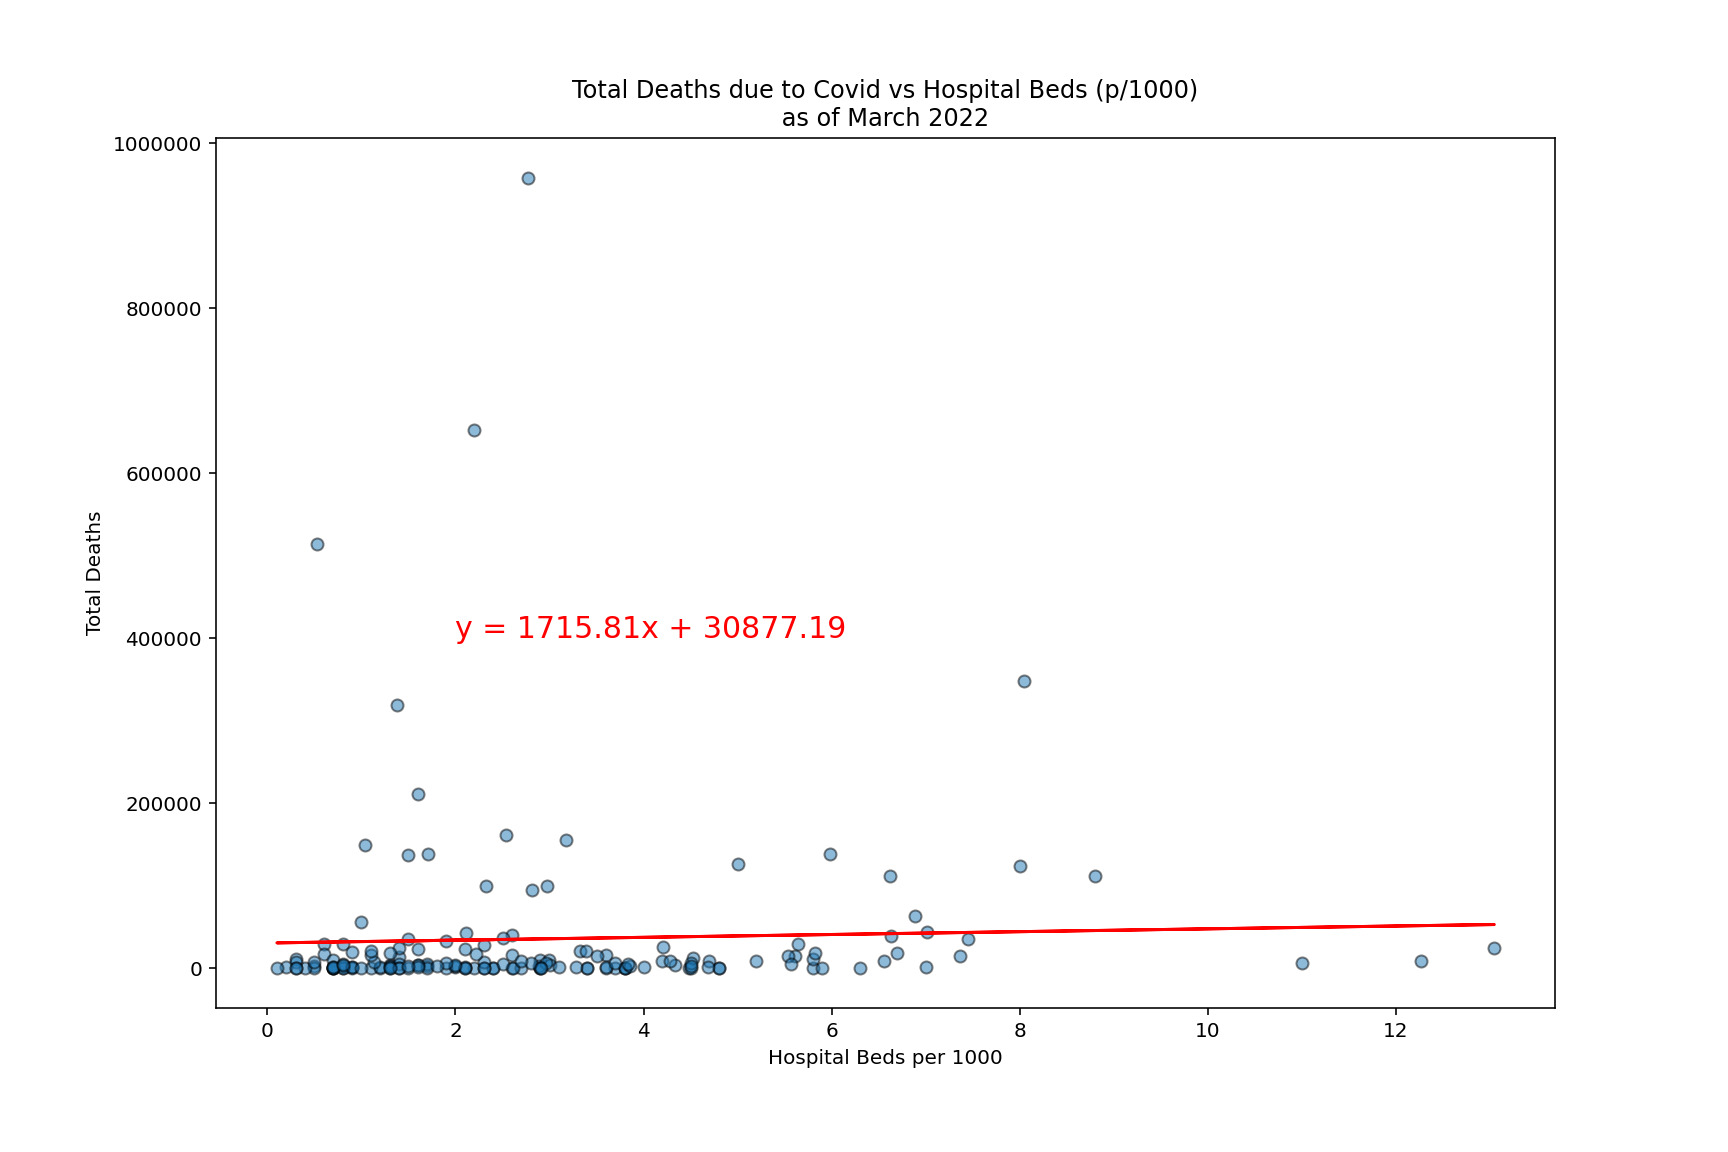

In [22]:
# Hospital Beds per thousands vs Total Deaths due to Covid scatter plot, linear regression and r-value 

# Creating variable to hold y and x axis
covid_copy  = world_covid[["hospital_beds_per_thousand", "total_deaths"]]
covid_copy  = covid_copy.dropna()
x_values = covid_copy['hospital_beds_per_thousand']
y_values = covid_copy['total_deaths']


# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 3)}')

# Plot Linear Regression
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.5)
plt.plot(x_values,regress_values,'r-')
plt.title('Total Deaths due to Covid vs Hospital Beds (p/1000)\n as of March 2022 ')
plt.xlabel('Hospital Beds per 1000')
plt.ylabel('Total Deaths')
plt.ticklabel_format(style='plain')
plt.annotate(line_eq, (2, 400000), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('Images/hospital_beds.png')


# Show the plotted figure
plt.show()

The equation of line is y = 1867.64x + -24389.01
The r-value is: 0.03


<IPython.core.display.Javascript object>


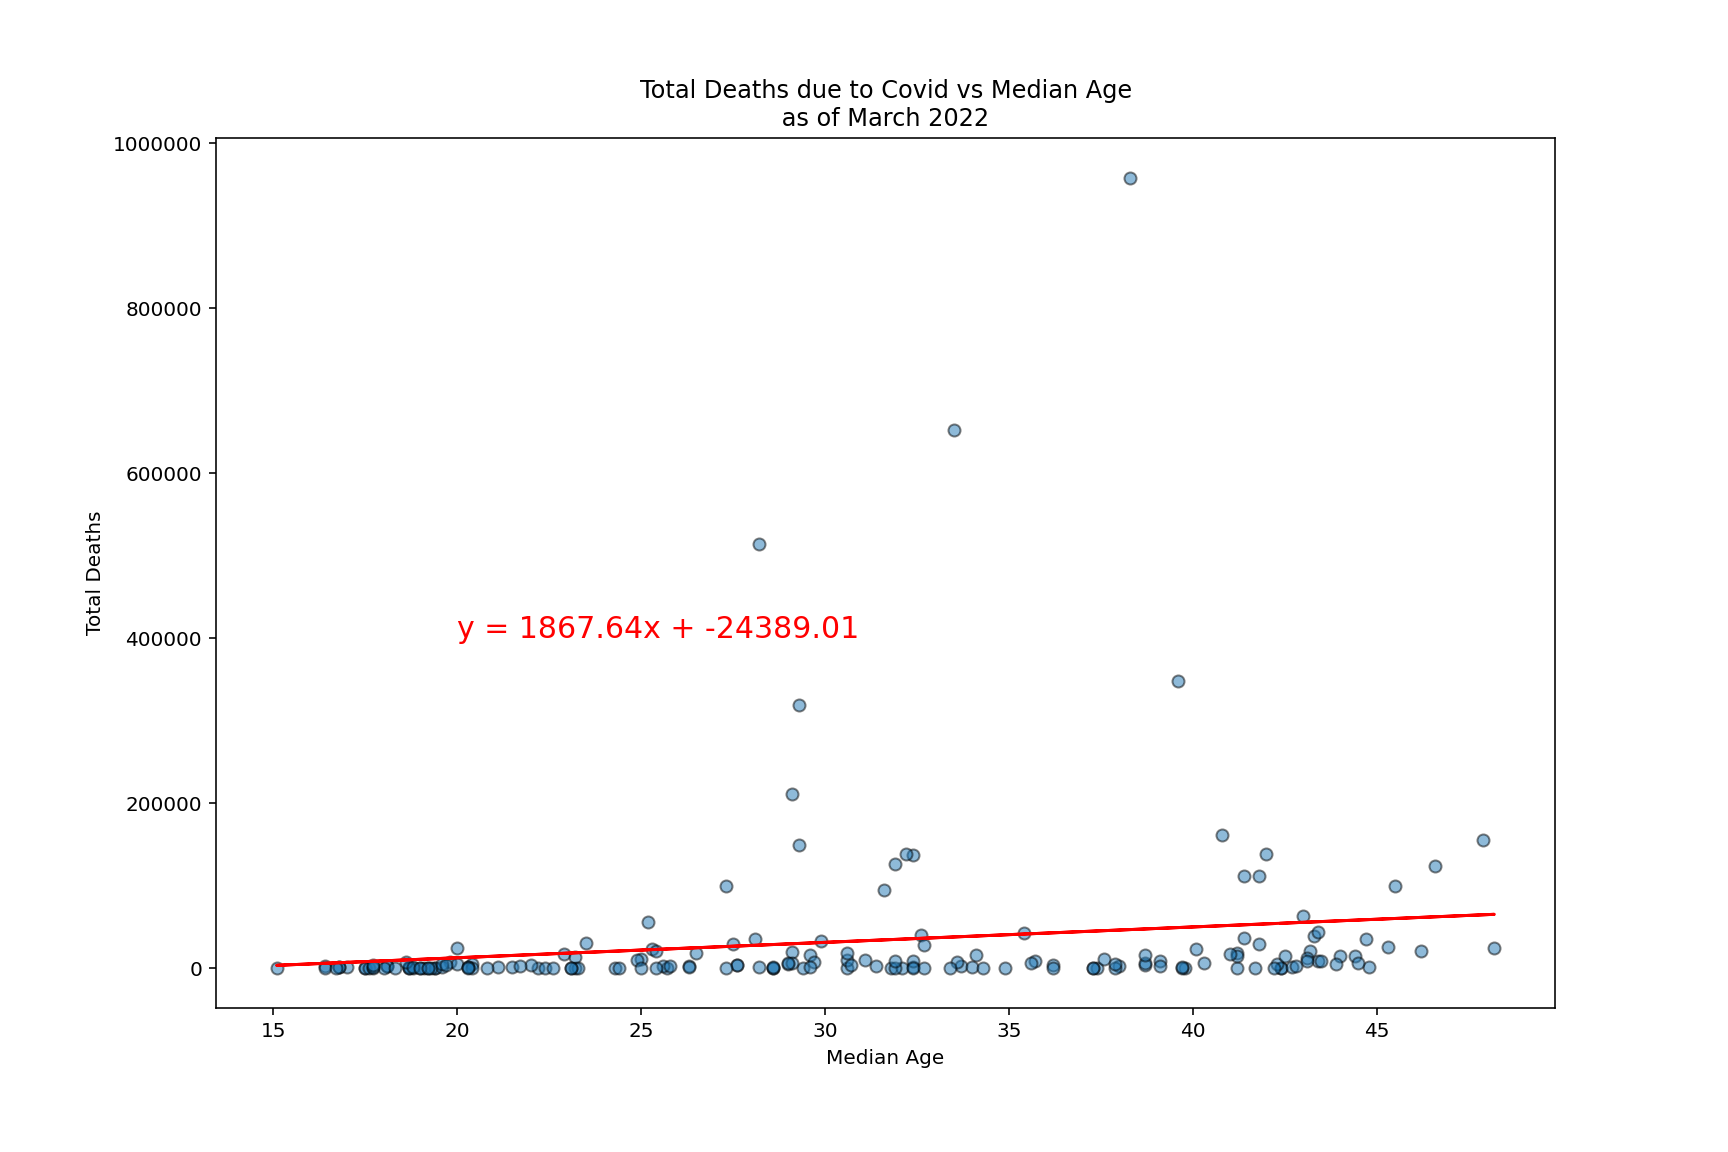

In [23]:
# Median age vs Total Deaths due to Covid scatter plot, linear regression and r-value 

# Creating variable to hold y and x axis
covid_copy = world_covid[['median_age', "total_deaths"]]
covid_copy = covid_copy.dropna()
x_values = covid_copy['median_age']
y_values = covid_copy['total_deaths']


# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values, alpha=0.5, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.title('Total Deaths due to Covid vs Median Age\n as of March 2022 ')
plt.xlabel('Median Age')
plt.ylabel('Total Deaths')
plt.ticklabel_format(style='plain')
plt.annotate(line_eq,(20, 400000), fontsize=15, color='red')

# Show the plotted figure
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/covid_age.png')

## Observations on Median Age vs Total Deaths due to Covid scatter plot, linear regression and r-value: 


#### In the below scatter plot with linear regression lines analysing the relationship between a country's Median Age and their Total Deaths Due to Covid we can't find a positve linear relationship with an r-value of 0.03.

The equation of line is y = -263.42x + 2291224.12
The r-value is: 0.001


<IPython.core.display.Javascript object>


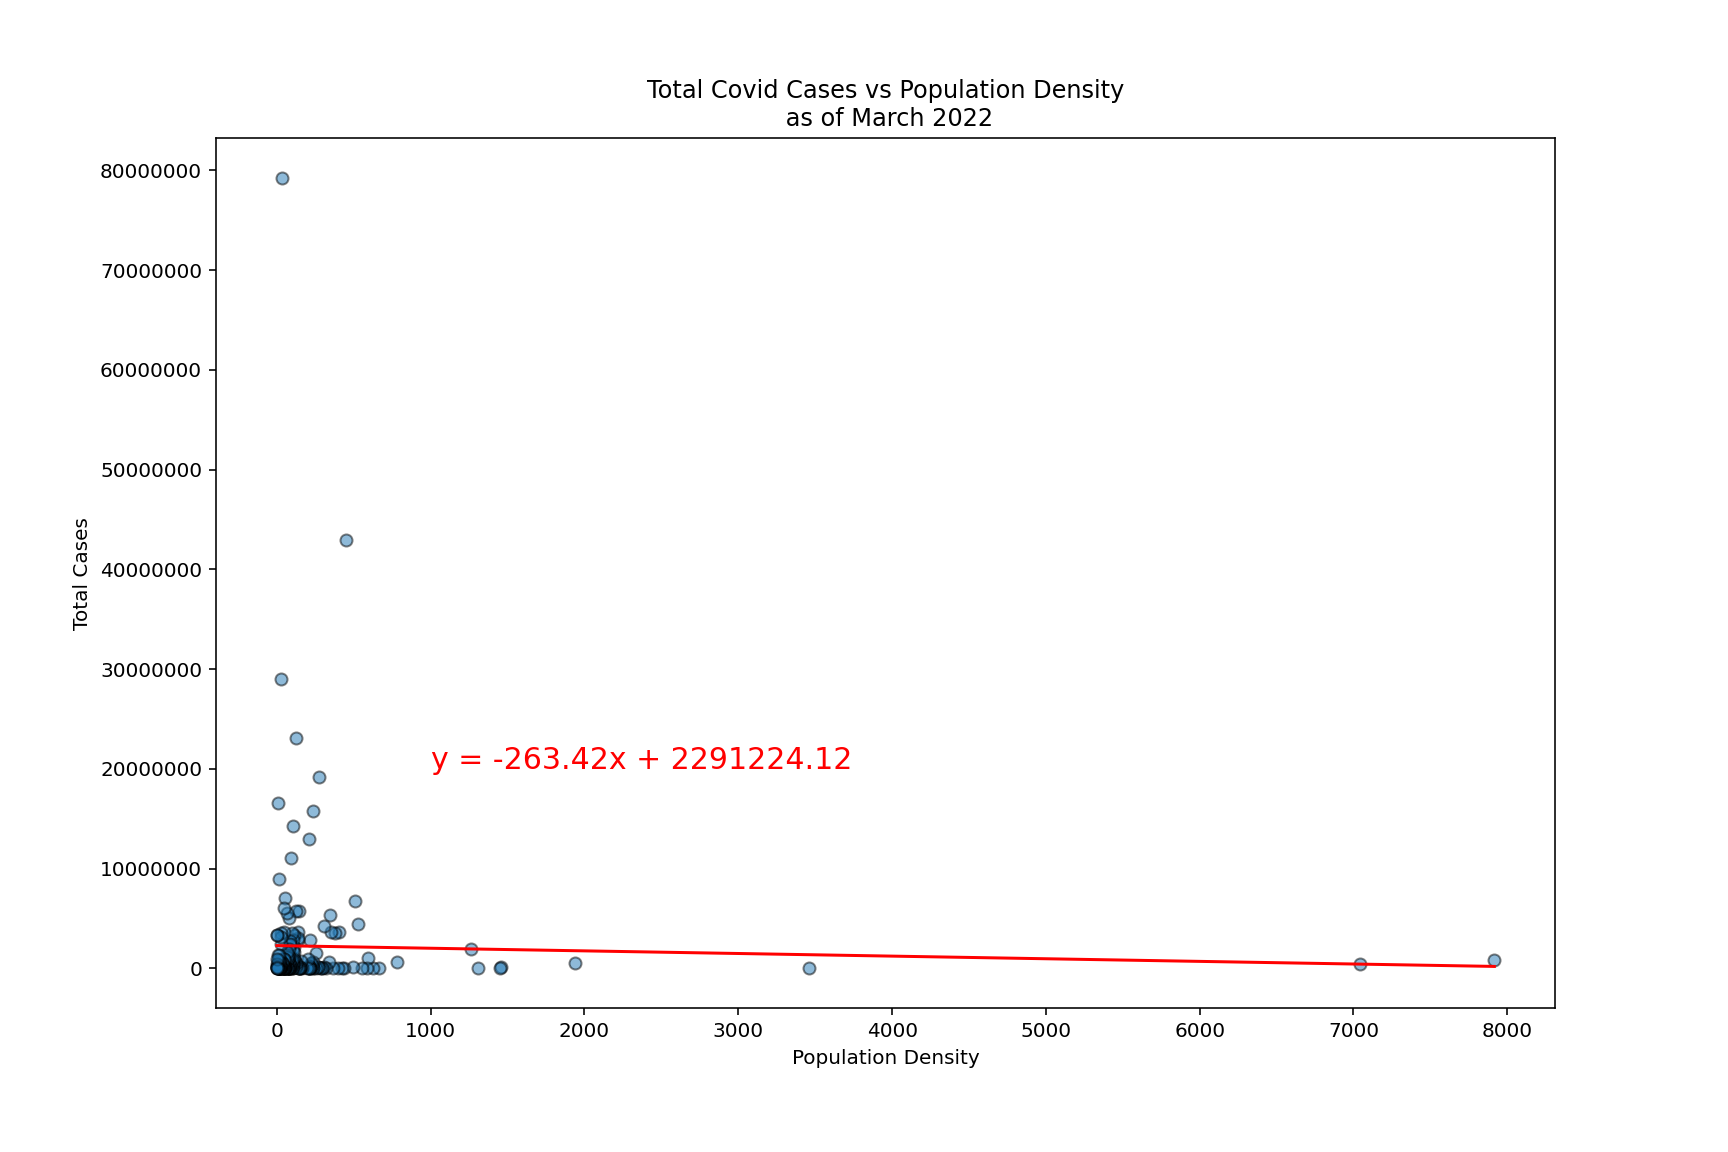

In [24]:
# Population density vs Total Covid cases due to Covid scatter plot, linear regression and r-value 

# Creating variable to hold y and x axis
covid_copy = world_covid[['population_density', "total_cases"]]
covid_copy = covid_copy.dropna()
x_values = covid_copy['population_density']
y_values = covid_copy['total_cases']



# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 3)}')

# Plot Linea Regression
plt.scatter(x_values,y_values,alpha=0.5, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.title('Total Covid Cases vs Population Density\n as of March 2022')
plt.xlabel('Population Density')
plt.ylabel('Total Cases')
plt.ticklabel_format(style='plain')
plt.annotate(line_eq,(1000, 20000000), fontsize=15, color='red')

# Show the plot
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/covid_population.png')

## Observations on Population Density vs Total Confirmed Covid cases scatter plot, linear regression and r-value: 


#### In the below scatter plot with linear regression lines analysing the relationship between a Country's Population Density level and their Total Covid Cases we can't find a positve linear relationship with an r-value of 0.001.

# Loading csv files into DataFrames for plotting

In [7]:
# Import csv files as DataFrame for plotting
highest_deaths = pd.read_csv('output_data/highest_deaths.csv')
highest_deaths.head()

,iso_code,continent,country,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,hospital_beds_per_thousand,life_expectancy,latitude,longitude,% of World Total Deaths,% of World Total Cases,% of World Population
0,USA,North America,United States,2022-05-03,79265726.0,958437.0,238095.936,2878.923,332915074,35.608,38.3,15.413,9.732,2.77,78.86,37.090240,-95.712891,15.995,17.817,4.245
1,BRA,South America,Brazil,2022-05-03,29040800.0,652216.0,135708.832,3047.832,213993441,25.040,33.5,8.552,5.060,2.20,75.88,-14.235004,-51.925280,10.885,6.528,2.729
2,IND,Asia,India,2022-05-03,42962953.0,515036.0,30832.980,369.623,1393409033,450.419,28.2,5.989,3.414,0.53,69.66,20.593684,78.962880,8.595,9.657,17.767
3,RUS,Europe,Russia,2022-05-03,16619507.0,348467.0,113900.875,2388.199,145912022,8.823,39.6,14.178,9.393,8.05,72.58,61.524010,105.318756,5.815,3.736,1.861
4,MEX,North America,Mexico,2022-05-03,5554392.0,319604.0,42640.084,2453.543,130262220,66.444,29.3,6.857,4.321,1.38,75.05,23.634501,-102.552784,5.334,1.248,1.661


In [8]:
# Import csv files as DataFrame for plotting
highest_cases = pd.read_csv('output_data/highest_cases.csv')
highest_cases.head()

,iso_code,continent,country,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,hospital_beds_per_thousand,life_expectancy,latitude,longitude,% of World Total Deaths,% of World Total Cases,% of World Population
0,USA,North America,United States,2022-05-03,79265726.0,958437.0,238095.936,2878.923,332915074,35.608,38.3,15.413,9.732,2.77,78.86,37.090240,-95.712891,15.995,17.817,4.245
1,IND,Asia,India,2022-05-03,42962953.0,515036.0,30832.980,369.623,1393409033,450.419,28.2,5.989,3.414,0.53,69.66,20.593684,78.962880,8.595,9.657,17.767
2,BRA,South America,Brazil,2022-05-03,29040800.0,652216.0,135708.832,3047.832,213993441,25.040,33.5,8.552,5.060,2.20,75.88,-14.235004,-51.925280,10.885,6.528,2.729
3,FRA,Europe,France,2022-05-03,23064766.0,139312.0,342095.547,2066.269,67422000,122.578,42.0,19.718,13.079,5.98,82.66,46.227638,2.213749,2.325,5.184,0.860
4,GBR,Europe,United Kingdom,2022-05-03,19172095.0,162152.0,281086.442,2377.347,68207114,272.898,40.8,18.517,12.527,2.54,81.32,55.378051,-3.435973,2.706,4.309,0.870


In [9]:
# Import csv files as DataFrame for plotting
continent_covid = pd.read_csv('output_data/continent_covid.csv')
continent_covid

,continent,total_cases,total_deaths,population,% of World Total Deaths,% of World Total Cases,% of World Population
0,Africa,11268386.0,249206.0,1371693397,4.157,2.535,17.491
1,Asia,120758338.0,1363608.0,4651957696,22.754,27.142,59.316
2,Europe,161014546.0,1721972.0,748850203,28.737,36.194,9.551
3,North America,93397289.0,1387009.0,592834824,23.148,20.993,7.558
4,Oceania,3831682.0,8037.0,43202462,0.134,0.861,0.551
5,South America,54622339.0,1262230.0,433953687,21.065,12.279,5.534


## We only imported the highest deaths and cases csv files above as they had enough data to plot and analyse below

<IPython.core.display.Javascript object>


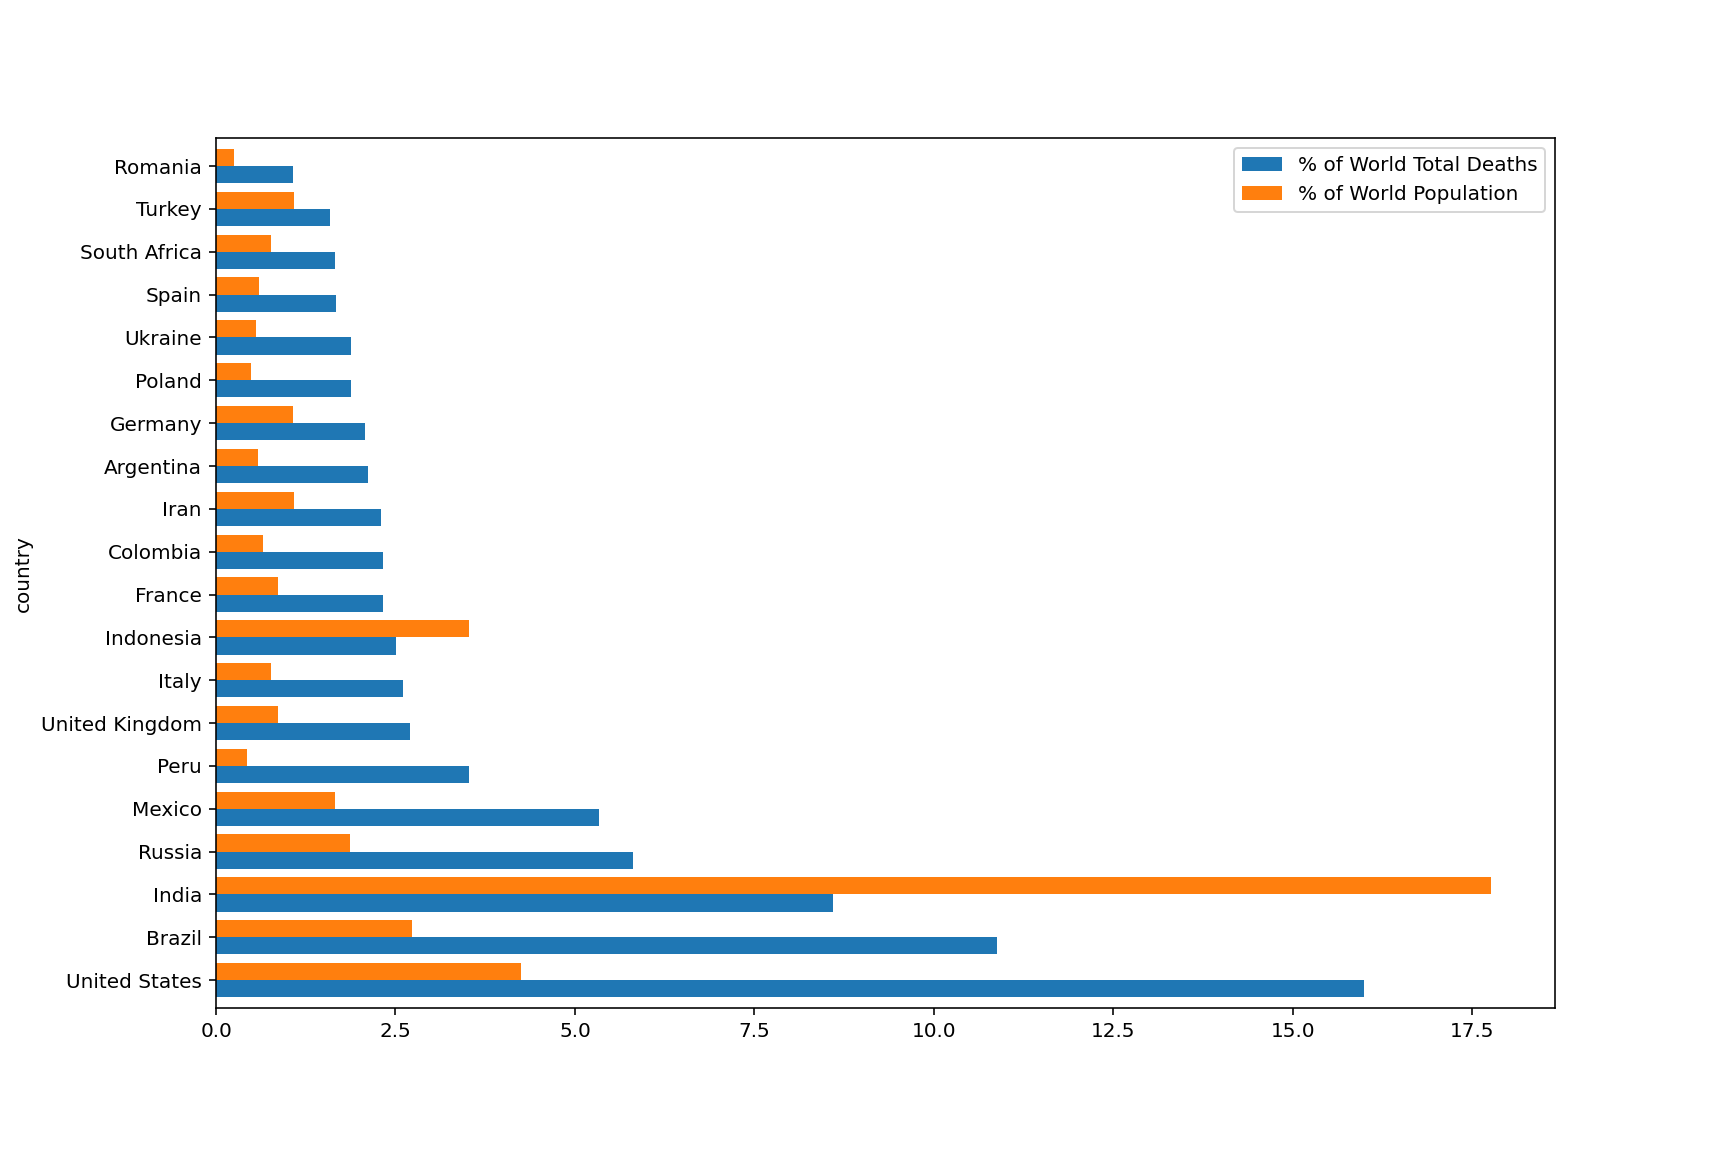

In [25]:
# Plotting Top 20 Countries with highest Deaths due to Covid as of March 2022
# Countries % of World Total deaths vs Countries % of World Population

highest_deaths.plot(x='country', y=['% of World Total Deaths', '% of World Population'], 
                    kind="barh", width=0.8, figsize=(12,8))

# Show the plot
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/top_deaths.png')

<IPython.core.display.Javascript object>


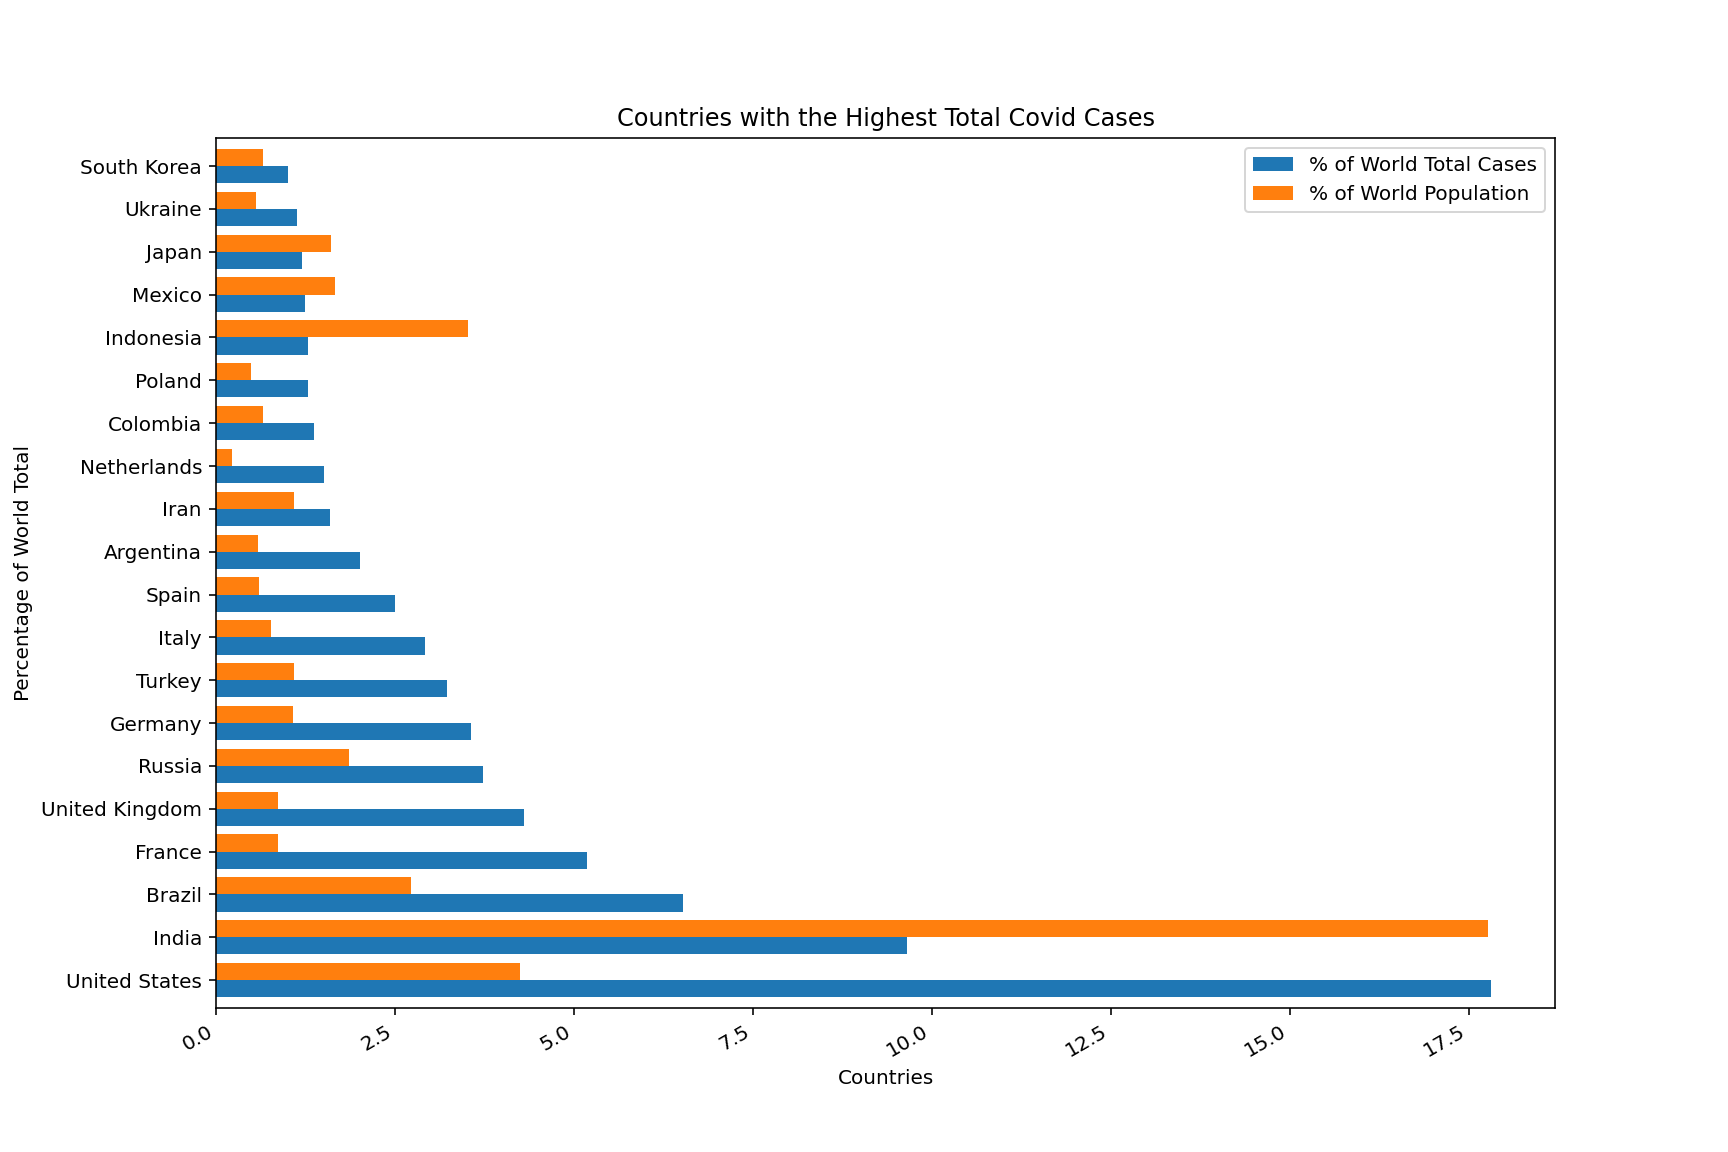

In [26]:
# Plotting Top 20 Countries with highest Total Confirmed Covid Cases as of March 2022
# Countries % of World Total cases vs Countries % of World Population

highest_cases.plot(x='country', y=['% of World Total Cases', '% of World Population'], 
                   kind="barh", width=0.8, figsize=(12,8))
plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Countries with the Highest Total Covid Cases')
plt.xlabel('Countries')
plt.ylabel('Percentage of World Total')
plt.show()

plt.savefig('Images/top_cases.png')

<IPython.core.display.Javascript object>


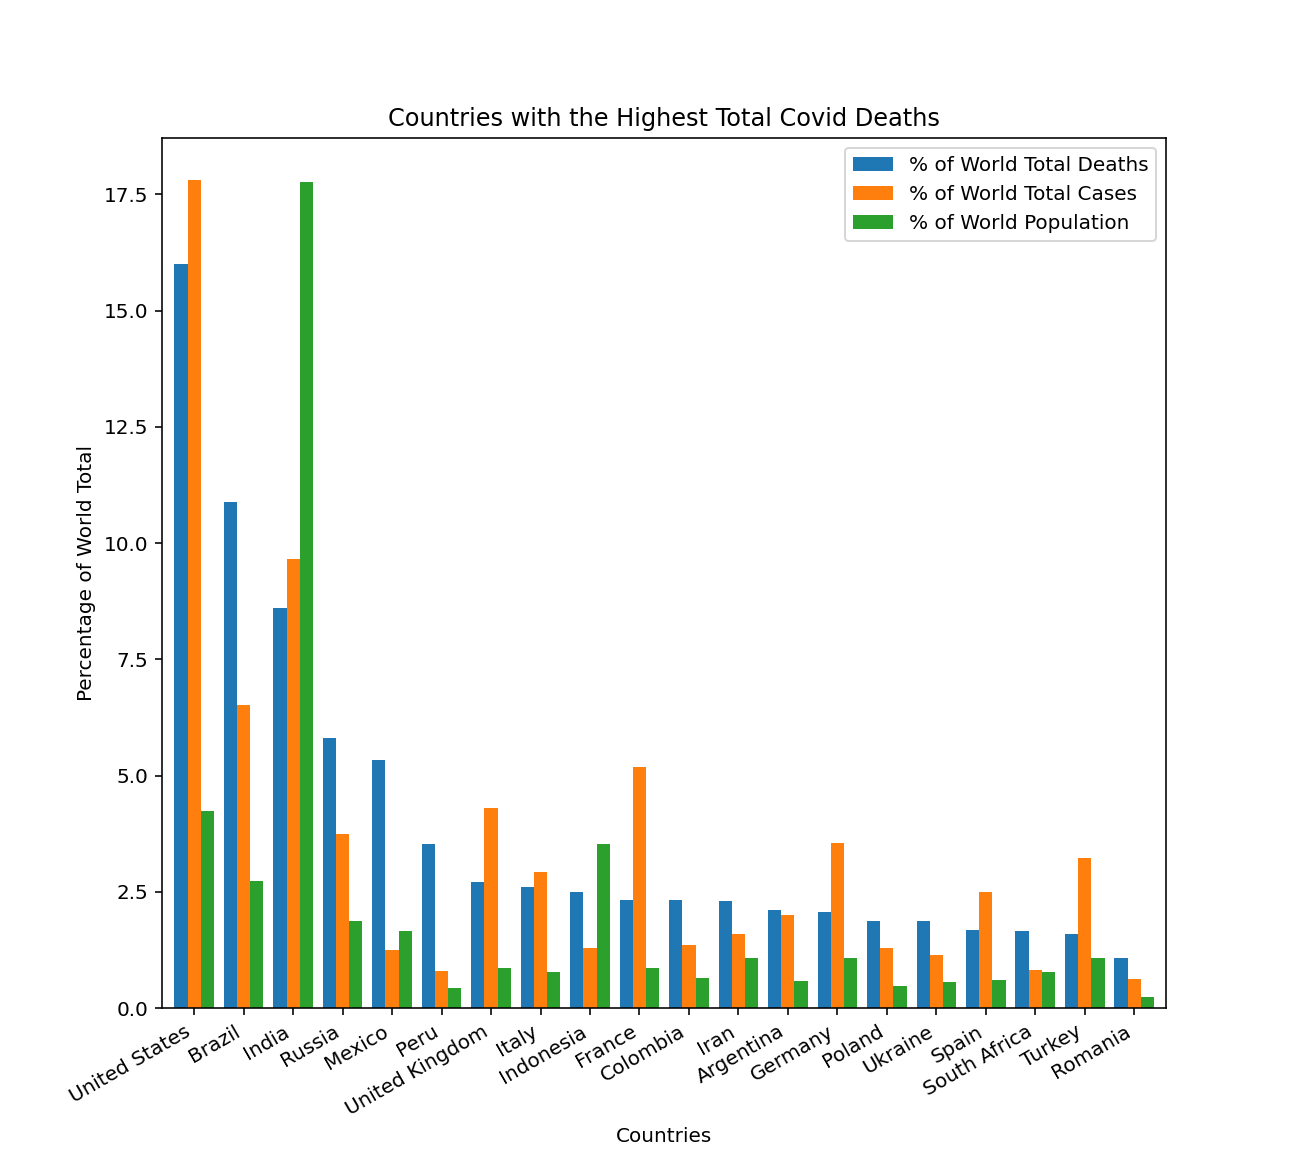

In [27]:
# Plotting Top 20 Countries with highest Deaths due to Covid as of March 2022

highest_deaths.plot(x='country', y=['% of World Total Deaths','% of World Total Cases', '% of World Population'], 
                    kind="bar", width=0.8, figsize=(9,8,))
plt.ticklabel_format(axis='y',style='plain') 
plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Countries with the Highest Total Covid Deaths')
plt.xlabel('Countries')
plt.ylabel('Percentage of World Total')
plt.show()

# Save the Bar chart as .png
plt.savefig('Images/top_covid_deaths.png')

<IPython.core.display.Javascript object>


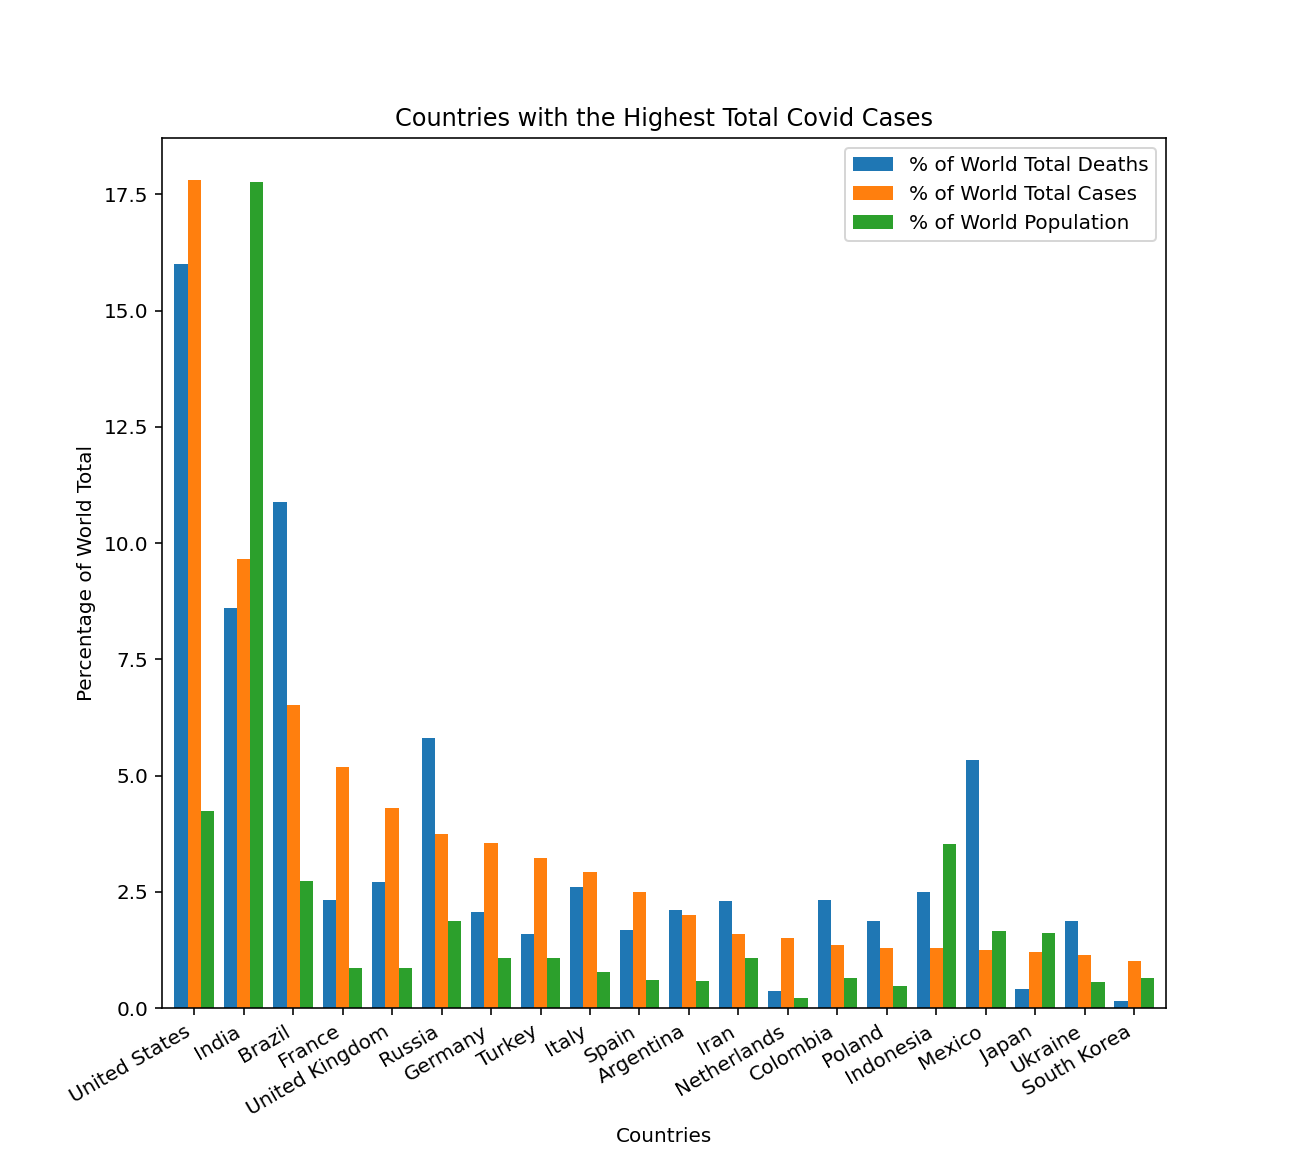

In [28]:
# Plotting Top 20 Countries with highest Total of Confirmed Covid Cases as of March 2022


highest_cases.plot(x='country', y=['% of World Total Deaths','% of World Total Cases', 
                                   '% of World Population'], kind="bar", width=0.8, figsize=(9,8))
plt.ticklabel_format(axis='y',style='plain') 
plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Countries with the Highest Total Covid Cases')
plt.xlabel('Countries')
plt.ylabel('Percentage of World Total')
# plt.savefig('/output_data/')
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/top_covid_cases.png')

<IPython.core.display.Javascript object>


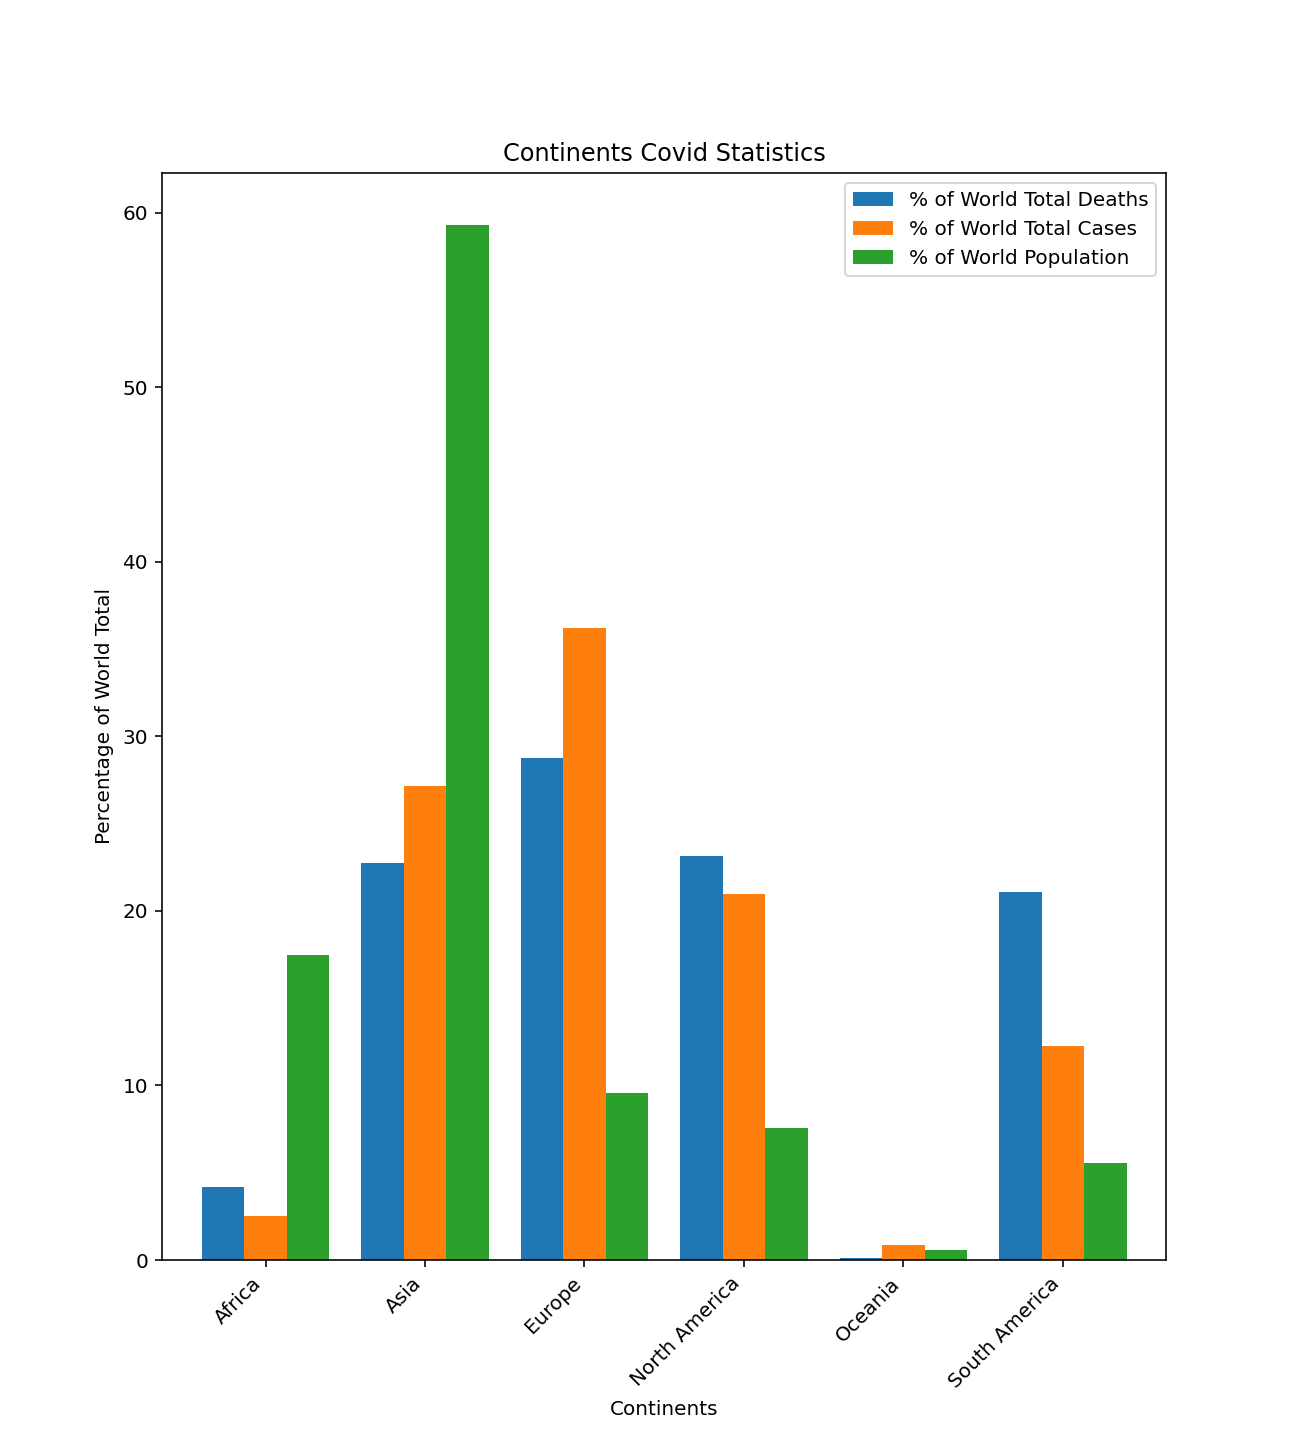

In [29]:
# Plotting Covid statistics by Contintent as of March 2022

continent_covid.plot(x='continent', y=['% of World Total Deaths','% of World Total Cases', 
                                       '% of World Population'], kind='bar', width=0.8, figsize=(9,10))
plt.ticklabel_format(axis='y',style='plain') 
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Continents Covid Statistics')
plt.xlabel('Continents')
plt.ylabel('Percentage of World Total')
plt.show()


# Save the plotted figure as .png
plt.savefig('Images/continent_covid.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


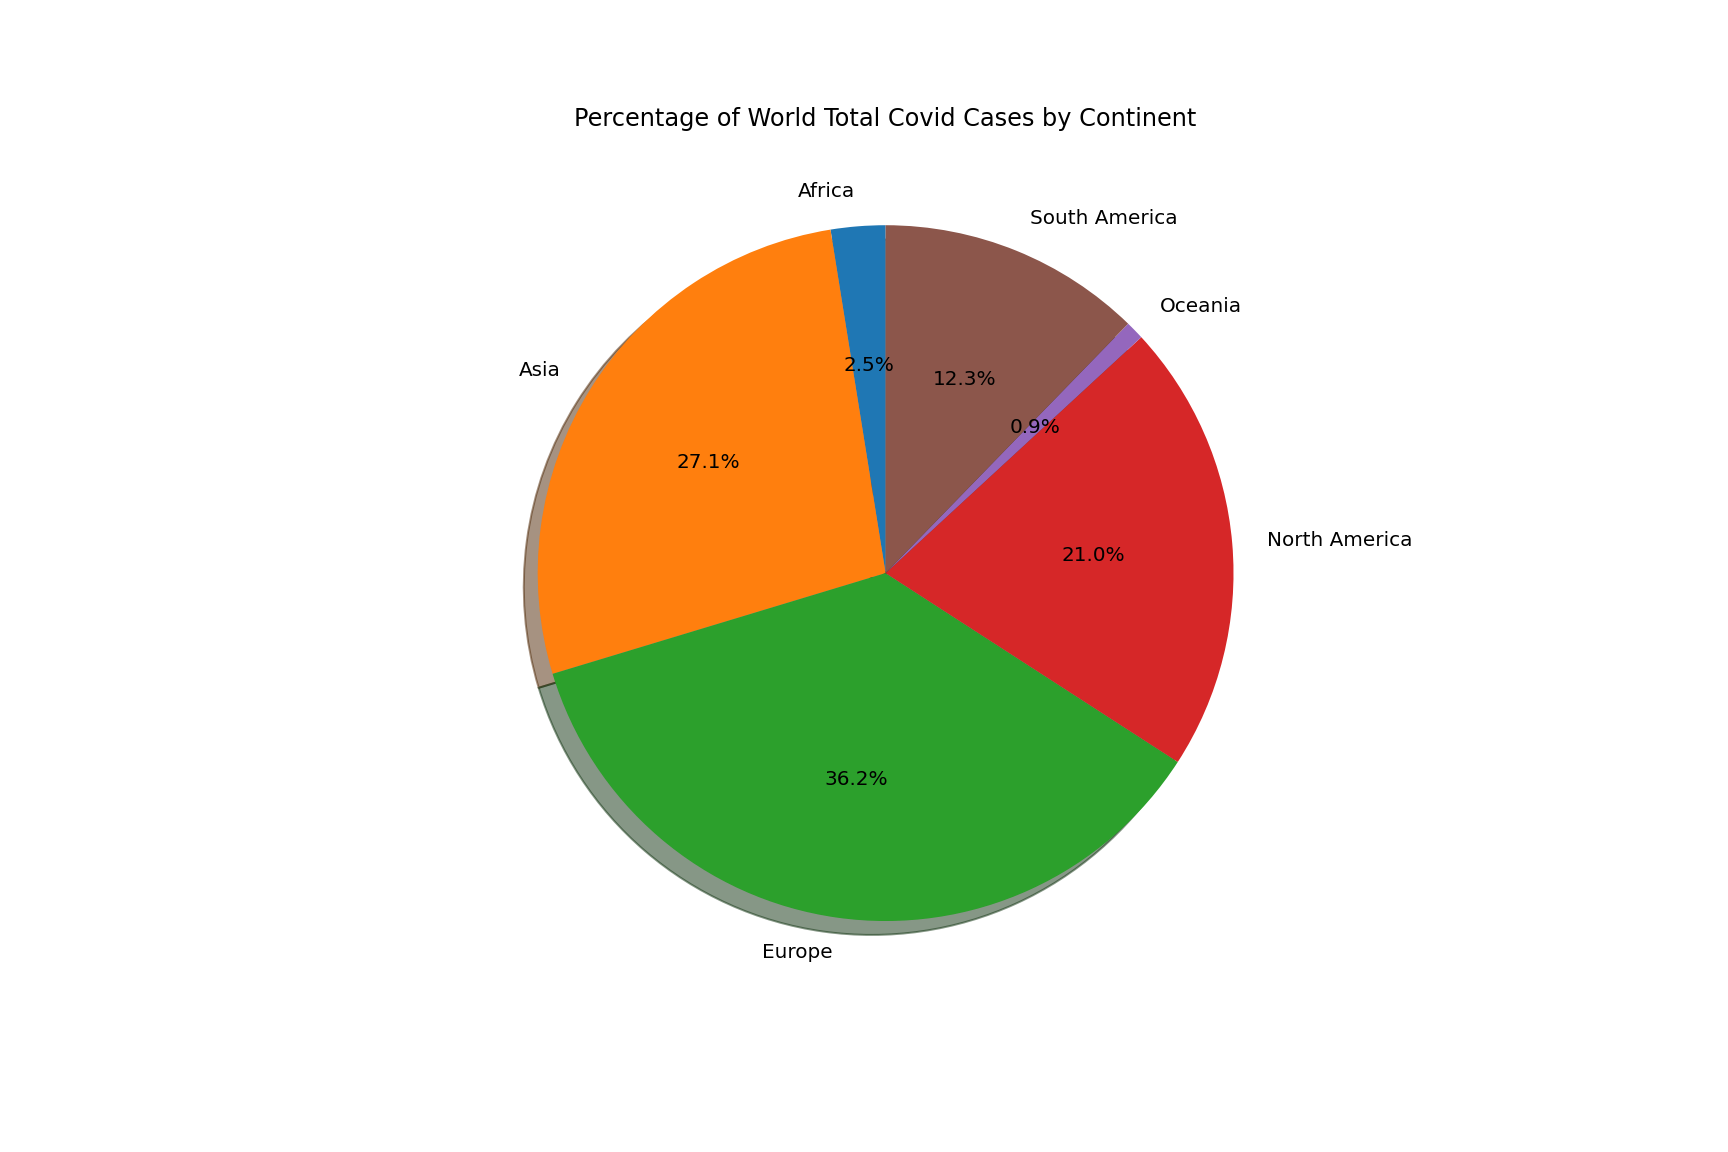

In [30]:
# Plotting Covid statistics by Contintent as of March 2022
plt.pie(continent_covid['total_cases'], labels=continent_covid['continent'], 
        shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Percentage of World Total Covid Cases by Continent')
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/continent_piecovid.png')

<IPython.core.display.Javascript object>


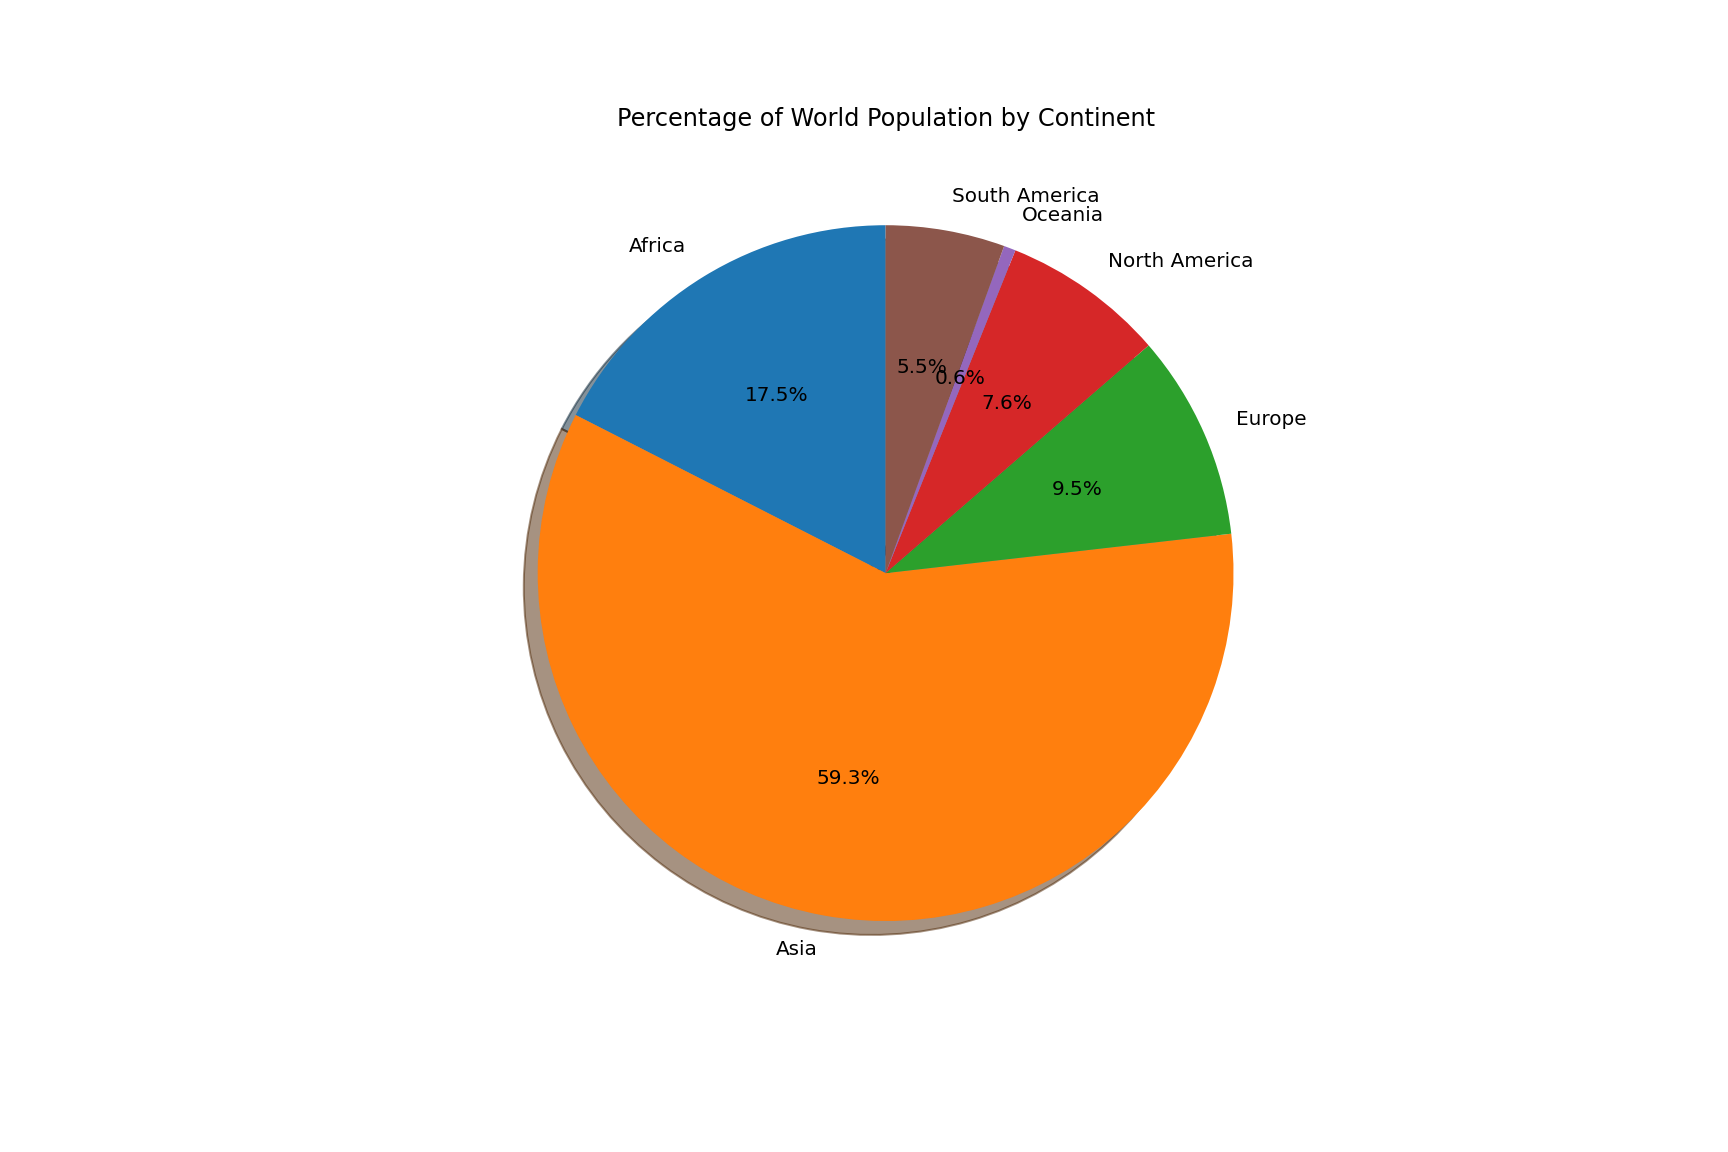

In [31]:
# Plotting Covid statistics by Contintent as of March 2022
plt.pie(continent_covid['population'], labels=continent_covid['continent'], 
        shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Percentage of World Population by Continent')
plt.show()

# Save the plotted figure as .png
plt.savefig('Images/continent_population')

# Covid HeatMaps

In [32]:
#Create Covid HeatMap of data as of March 2022

# Use Lat and Lng as locations and Total Covid Cases as weight
heatmap_copy = world_covid[['latitude', 'longitude', 'total_cases', 'country']]
heatmap_copy = heatmap_copy.dropna()
locations = heatmap_copy[['latitude', 'longitude']] 
cases_copy= heatmap_copy['total_cases']
total_cases = cases_copy


# Plot Heatmap
fig = gmaps.figure()

# Create heat layer (max_intensity at the maximum level of deaths?)
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights=total_cases,
                                 dissipating=False,
                                 max_intensity=2000000,
                                 point_radius=3)
 
# Add heat layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Markers info_box
info_box_template = """
<dl>
<dt>Total Covid Cases</dt><dd>{total_cases}</dd>
<dt>Country</dt><dd>{country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
country_info = [info_box_template.format(**row) for index, row in heatmap_copy.iterrows()]
locations = heatmap_copy[['latitude', 'longitude']]

In [20]:
# Add marker layer ontop of heat map

markers = gmaps.marker_layer(locations, info_box_content = country_info)
fig.add_layer(markers)
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Data Analysis

 -- At the start of the coronavirus (COVID-19) pandemic there was concern that cases would overwhelm hospital capacity and that more densely populated countries would be more affected. Our Data Analysis didn’t show it clearly but that could be due to the data being incomplete and not being able to investigate further. 
 
 -- We found that there was a better question behind why the Top 20 countries did so badly compared to countries with fewer hospital beds per population or even lower GDP or a higher population density. 
 
-- The charts show clearly that Asia and Africa did better than other continents. Could this be due to lower median age or because of lack of reporting? Our analysis brought more questions than answers to our questions at the start of the project.
